In [25]:
import pandas as pd 
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("D:\Semester 4\Data Analysis\Research Dataset\GapMinder Codebook.csv", on_bad_lines='error', na_filter=True, na_values='str')

In [3]:
print(len(df))

213


In [4]:
print(len(df.columns))

16


## We can get generalised information about the data here


In [5]:
df.describe()

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
count,213,213,213,213,213,213,213,213,213,213,213,213,213,213,213,213
unique,213,191,181,165,137,201,154,47,193,190,64,22,133,192,140,195
top,Afghanistan,,,,,,,,,,,,,,,
freq,1,23,26,49,40,13,35,66,21,22,150,52,77,22,35,10


In [6]:
df.head(10)

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
0,Afghanistan,,0.03,0.5696534,26.8,75944000,25.60000038,,3.654121623,48.673,,0,,6.6843853,55.70000076,24.04
1,Albania,1914.996551,7.29,1.0247361,57.4,223747333.3,42.09999847,,44.98994696,76.918,,9,636.3413834,7.699329853,51.40000153,46.72
2,Algeria,2231.993335,0.69,2.306817,23.5,2932108667,31.70000076,0.1,12.50007331,73.131,0.420094525,2,590.5098143,4.848769665,50.5,65.22
3,Andorra,21943.3399,10.17,,,,,,81,,,,,5.362178802,,88.92
4,Angola,1381.004268,5.57,1.4613288,23.1,248358000,69.40000153,2,9.999953883,51.093,,-2,172.9992274,14.55467701,75.69999695,56.7
5,Antigua and Barbuda,11894.46407,8.17,,,16225000,,,80.64545455,,,,,2.1618433,,30.46
6,Argentina,10749.41924,9.35,0.560987,73.9,5872119000,45.90000153,0.5,36.00033495,75.901,0.635943801,8,768.4282997,7.765584,58.40000153,92
7,Armenia,1326.741757,13.66,2.6184384,51.6,51219666.67,34.20000076,0.1,44.00102458,74.241,,5,603.7630576,3.741587877,40.09999847,63.86
8,Aruba,,,,,35871000,,,41.80088889,75.246,,,,,,46.78
9,Australia,25249.98606,10.21,0.4862799,83.2,12970092667,54.59999847,0.1,75.8956538,81.907,1.913026109,10,2825.391095,8.470030125,61.5,88.74


In [7]:
c1 = df["incomeperperson"].value_counts(sort=False, normalize=False, dropna=False)
print("as you can see the datatype of c1 is INT64", c1)
print("\n where as actual datatype is Object \n", df.dtypes)

#if Normalise= True then all the data will be divided by the sum of the whole coloumn
#here missing data has been dropped, to get those data you can add dropna = False
#bins = x (x=1,2,3...)

as you can see the datatype of c1 is INT64                23
1914.996551     1
2231.993335     1
21943.3399      1
1381.004268     1
               ..
5528.363114     1
722.8075588     1
610.3573673     1
432.226337      1
320.7718899     1
Name: incomeperperson, Length: 191, dtype: int64

 where as actual datatype is Object 
 country                 object
incomeperperson         object
alcconsumption          object
armedforcesrate         object
breastcancerper100th    object
co2emissions            object
femaleemployrate        object
hivrate                 object
internetuserate         object
lifeexpectancy          object
oilperperson            object
polityscore             object
relectricperperson      object
suicideper100th         object
employrate              object
urbanrate               object
dtype: object


In [8]:
c2 = df["employrate"].value_counts(sort=bool, normalize=False, dropna=False)
c2

               35
47.29999924     3
59.90000153     3
55.90000153     3
61.5            3
               ..
71.69999695     1
57.20000076     1
56.40000153     1
80.69999695     1
66.80000305     1
Name: employrate, Length: 140, dtype: int64

### IMPORTANT : dataset blank cells are in string and it is further in more than base10 values, So, astype will give error and similarly, tonumerical will give error because there is blank spaces, ehich means it can't be removed by read_csv(on_bad_lines=).


### Only way to change it according to my understaing is _convert


In [9]:
'''df["employrate"] = pd.to_numeric(df["employrate"], errors='coerce').isnull()
df['employrate']'''

df = df._convert(numeric=True)
df.head(20)

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
0,Afghanistan,NaN,0.03,0.569653,26.8,7.594400e+07,25.600000,NaN,3.654122,48.673,NaN,0.0,NaN,6.684385,55.700001,24.04
1,Albania,1914.996551,7.29,1.024736,57.4,2.237473e+08,42.099998,NaN,44.989947,76.918,NaN,9.0,636.341383,7.699330,51.400002,46.72
2,Algeria,2231.993335,0.69,2.306817,23.5,2.932109e+09,31.700001,0.10,12.500073,73.131,0.420095,2.0,590.509814,4.848770,50.500000,65.22
3,Andorra,21943.339900,10.17,NaN,NaN,NaN,NaN,NaN,81.000000,NaN,NaN,NaN,NaN,5.362179,NaN,88.92
4,Angola,1381.004268,5.57,1.461329,23.1,2.483580e+08,69.400002,2.00,9.999954,51.093,NaN,-2.0,172.999227,14.554677,75.699997,56.70
5,Antigua and Barbuda,11894.464070,8.17,NaN,NaN,1.622500e+07,NaN,NaN,80.645455,NaN,NaN,NaN,NaN,2.161843,NaN,30.46
6,Argentina,10749.419240,9.35,0.560987,73.9,5.872119e+09,45.900002,0.50,36.000335,75.901,0.635944,8.0,768.428300,7.765584,58.400002,92.00
7,Armenia,1326.741757,13.66,2.618438,51.6,5.121967e+07,34.200001,0.10,44.001025,74.241,NaN,5.0,603.763058,3.741588,40.099998,63.86
8,Aruba,NaN,NaN,NaN,NaN,3.587100e+07,NaN,NaN,41.800889,75.246,NaN,NaN,NaN,NaN,NaN,46.78
9,Australia,25249.986060,10.21,0.486280,83.2,1.297009e+10,54.599998,0.10,75.895654,81.907,1.913026,10.0,2825.391095,8.470030,61.500000,88.74


In [10]:
df.dtypes

country                  object
incomeperperson         float64
alcconsumption          float64
armedforcesrate         float64
breastcancerper100th    float64
co2emissions            float64
femaleemployrate        float64
hivrate                 float64
internetuserate         float64
lifeexpectancy          float64
oilperperson            float64
polityscore             float64
relectricperperson      float64
suicideper100th         float64
employrate              float64
urbanrate               float64
dtype: object

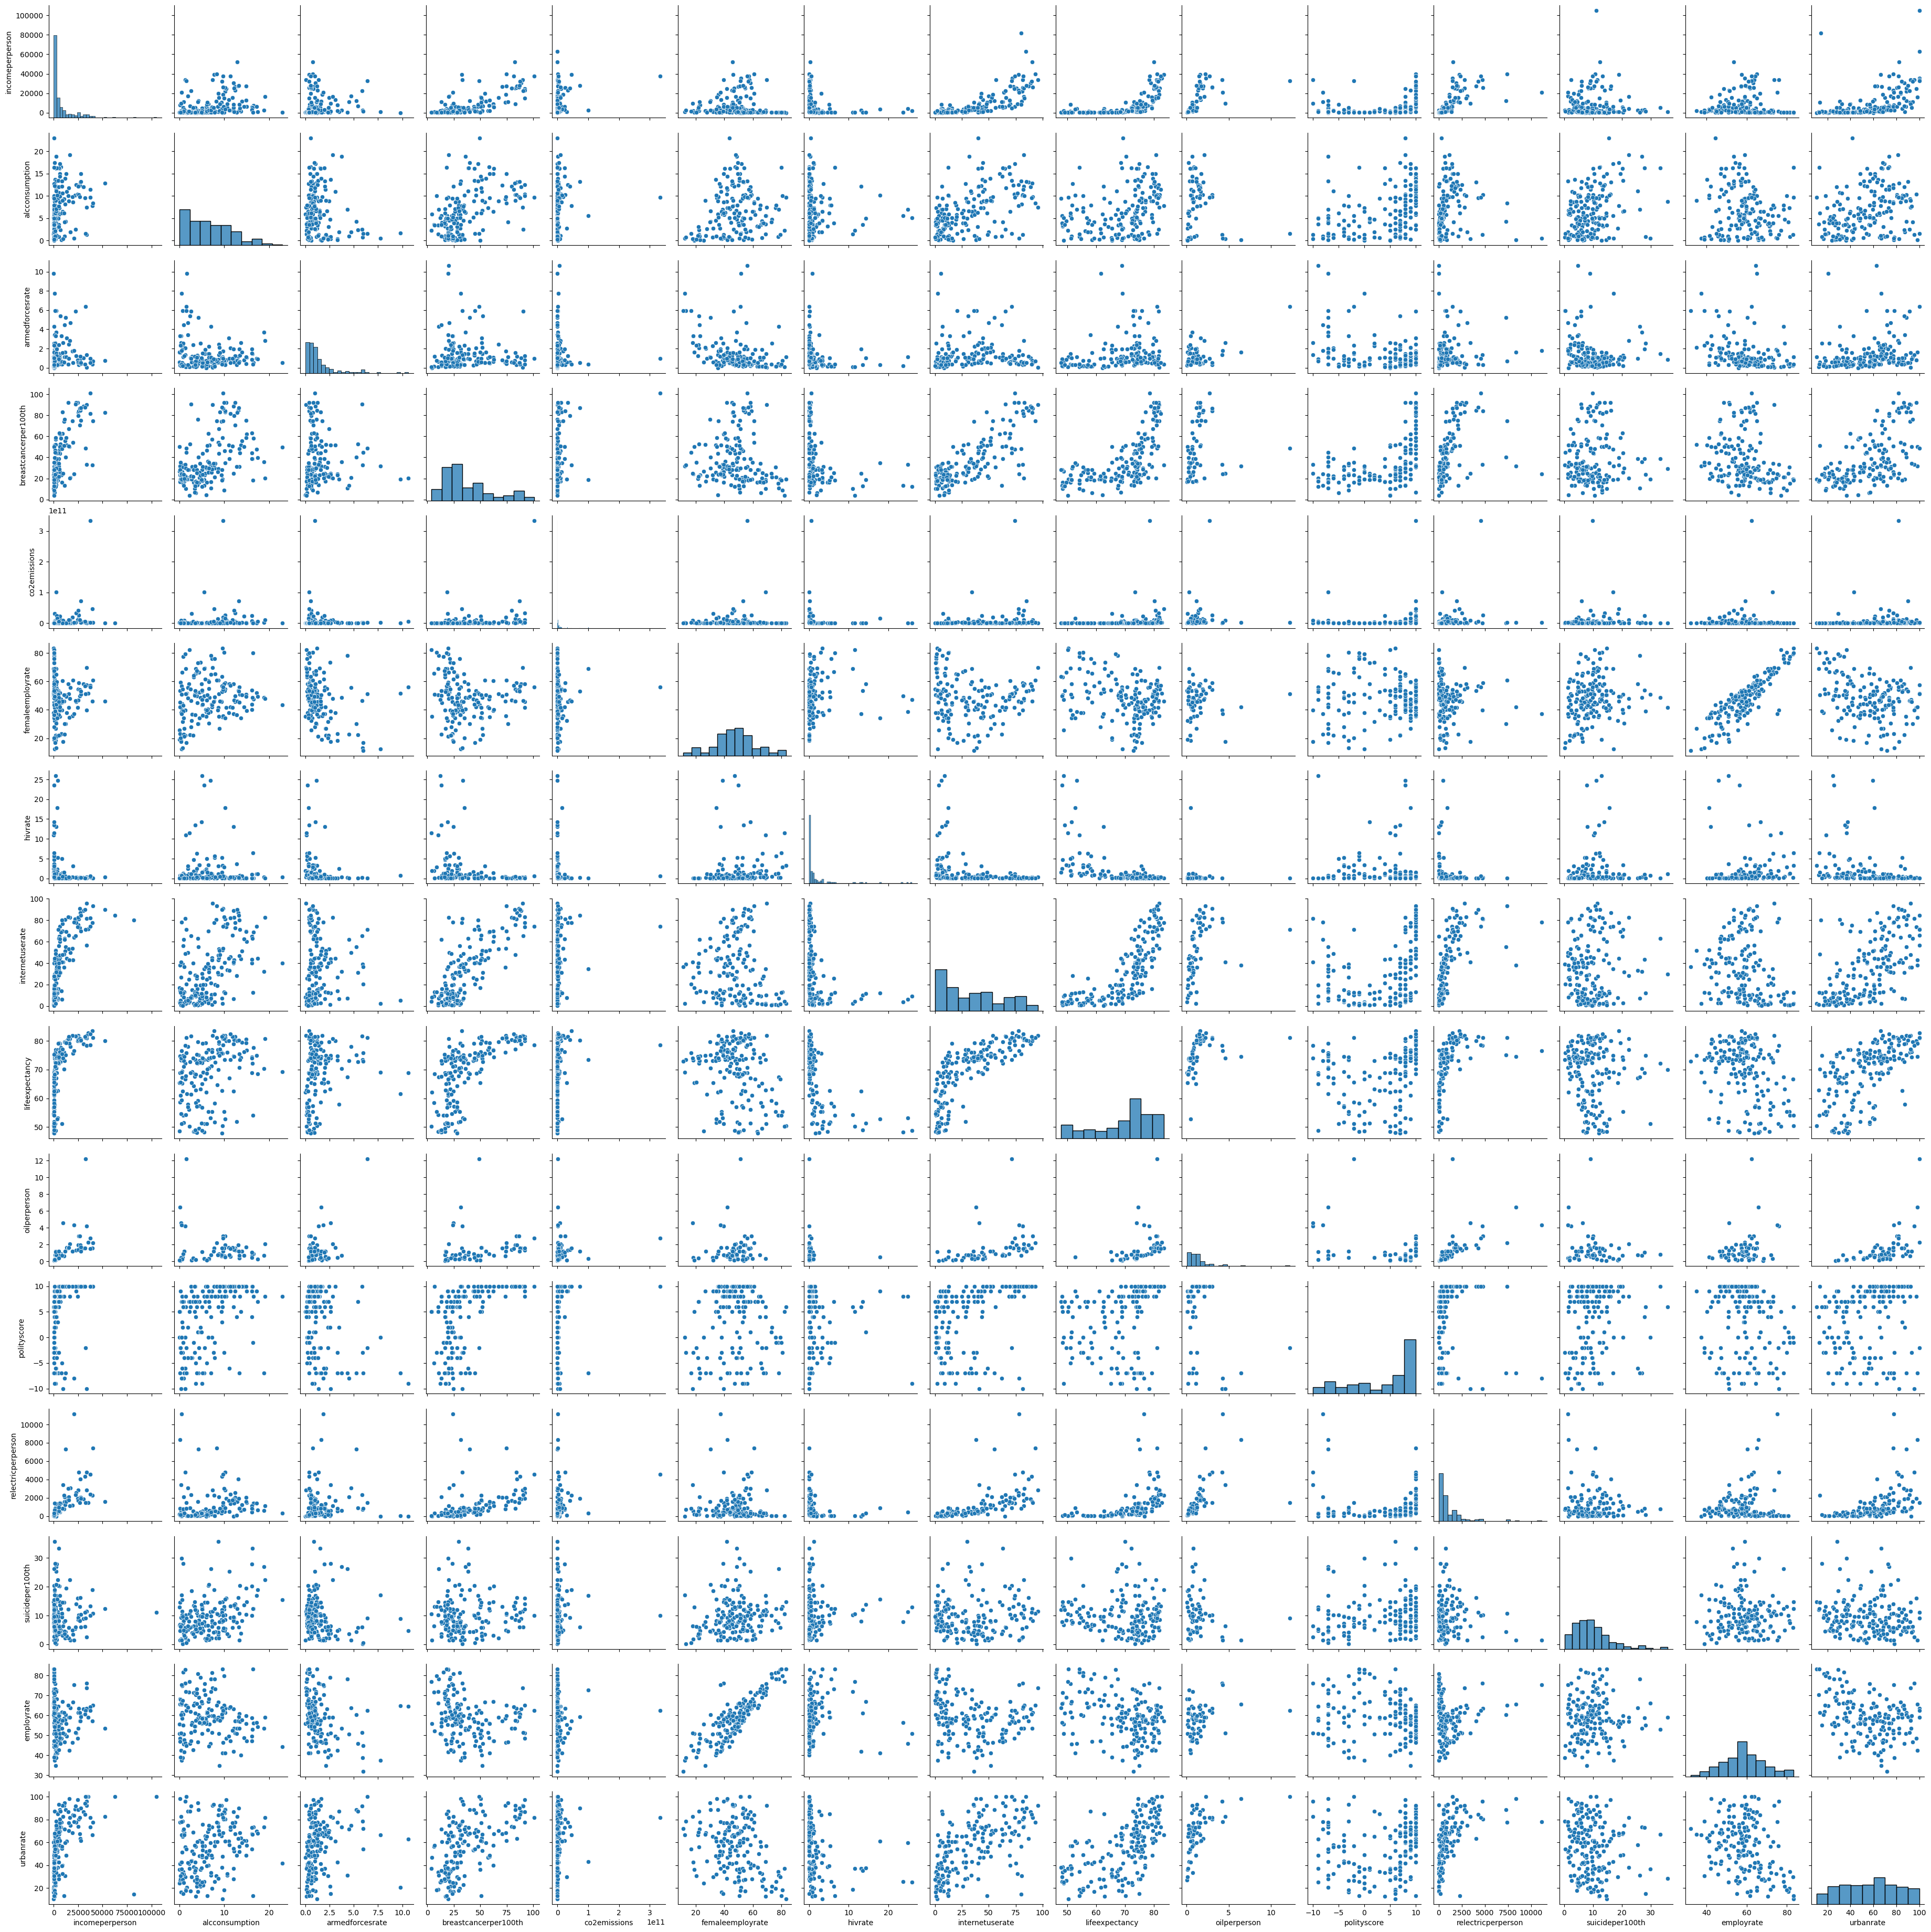

In [11]:
#sns.jointplot(x = "employrate", y ="incomeperperson" , data = df, kind = 'scatter' )
sns.pairplot(df)

<AxesSubplot:>

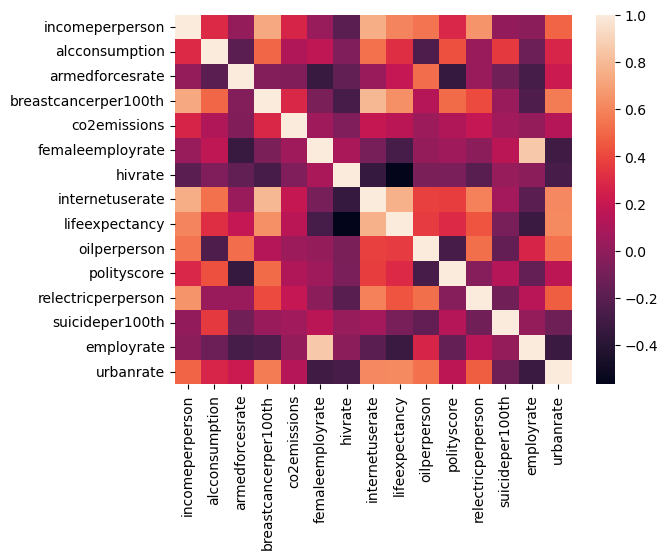

In [27]:
corr = df.corr()
htmap = sns.heatmap(corr)
#htmap = sns.heatmap(corr, annot=True)
htmap

<AxesSubplot:>

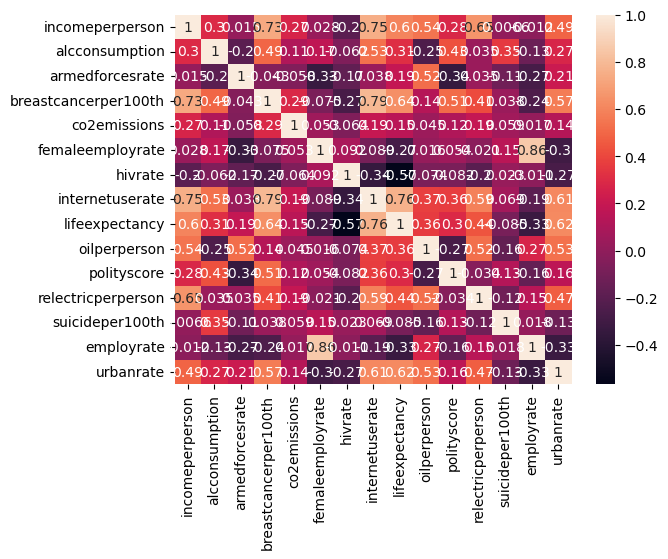

In [28]:
htmap = sns.heatmap(corr, annot=True)
htmap